In [ ]:
import functools
import os

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from google.colab import files

print("TF Version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.config.list_physical_devices('GPU'))

content = list(files.upload().keys())[0]
style = list(files.upload().keys())[0]



TF Version:  2.8.0
TF Hub version:  0.12.0
Eager mode enabled:  True
GPU available:  []


Saving 2022_20_2.png to 2022_20_2.png


Saving 2022_18_2.png to 2022_18_2.png


In [ ]:
##Loads and views image, not being used
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3, dtype=tf.float32)[tf.newaxis, ...]
  #img = tf.image.convert_image_dtype(img, tf.float32)


  #shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  #long_dim = max(shape)
  #scale = max_dim / long_dim

  #new_shape = tf.cast(shape * scale, tf.int32)

  ##img = tf.image.resize(img, new_shape)
  ##img = img[tf.newaxis, :]
  
  return img

##Show image

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)
#imshow(content_image)

In [ ]:
#Loading image and preprocessing

def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(img_file, image_size=(512, 512), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  image_path = img_file
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = tf.io.decode_image(
      tf.io.read_file(image_path),
      channels=3, dtype=tf.float32)[tf.newaxis, ...]
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()

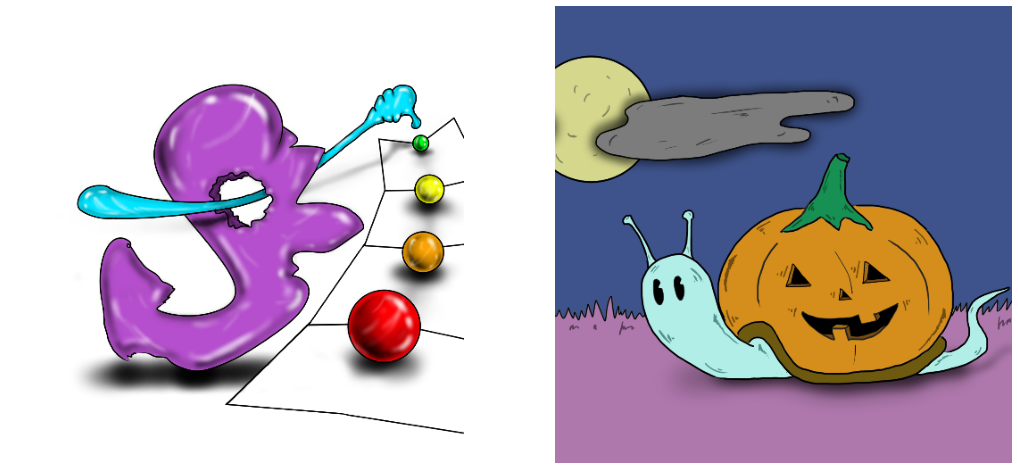

In [ ]:
output_image_size =   512# @param {type:"integer"}
content_img_size = (output_image_size, output_image_size)
content_image = load_image(content, content_img_size)

style_img_size = (512, 512)  # Recommended to keep it at 256.
style_image = load_image(style, style_img_size)

#style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')

show_n([content_image, style_image])

In [ ]:
hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

In [ ]:
outputs = hub_module(content_image, style_image)
stylized_image = outputs[0]

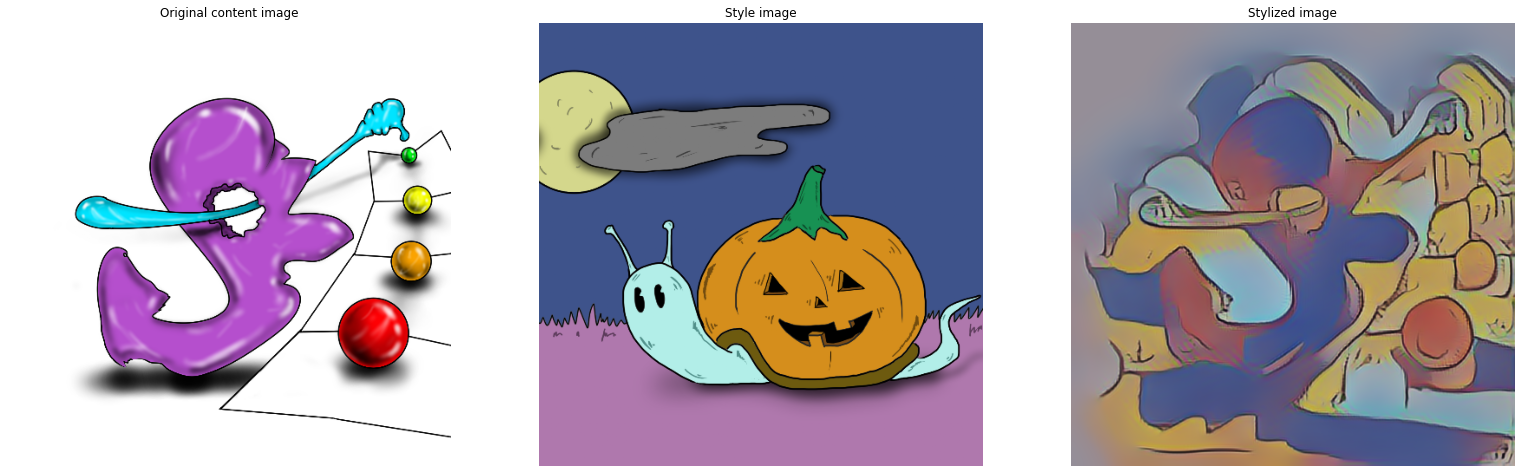

In [ ]:
show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])